In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator ,img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from keras.utils import plot_model
from keras import Model
from sklearn.metrics import confusion_matrix

In [ ]:
###########Change name for _gen

In [2]:
# import tensorflow as tf
# tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
train_dir = r'E:\Data Science\Projects\DL\Gender Classification\data\Training'
test_dir = r'E:\Data Science\Projects\DL\Gender Classification\data\Testing'

train_dir_male = train_dir + '/male'
train_dir_female = train_dir + '/female'

test_dir_male  = test_dir + '/male'
test_dir_female  = test_dir + '/female'

In [4]:
print('number of male training images - ', len(os.listdir(train_dir_male)))
print('number of female training images - ', len(os.listdir(train_dir_female)))
print('----------------------------------------------------------------------')
print('number of male testing  images - ', len(os.listdir(test_dir_male)))
print('number of female testing  images - ', len(os.listdir(test_dir_female)))

number of male training images -  23764
number of female training images -  23243
----------------------------------------------------------------------
number of male testing  images -  5751
number of female testing  images -  5841


In [5]:
data_generator = ImageDataGenerator(rescale = 1./255 , validation_split = 0.2)

In [6]:
batch_size = 64

training_data_gen = data_generator.flow_from_directory(directory = train_dir,
                                                   target_size = (64, 64),
                                                   class_mode ='binary',
                                                   color_mode = "rgb",
                                                   subset = 'training',
                                                   batch_size = batch_size,
                                                   shuffle=True)

validation_data_gen = data_generator.flow_from_directory(directory = train_dir,
                                                  target_size = (64, 64),
                                                  class_mode = 'binary',
                                                  color_mode = "rgb",
                                                  subset = 'validation',
                                                  batch_size = batch_size)

test_data_gen = data_generator.flow_from_directory(directory = test_dir,
                                                  target_size = (64, 64),
                                                  class_mode = None,
                                                  color_mode = "rgb",
                                                  batch_size = batch_size)


evaluation_generator_gen = data_generator.flow_from_directory(directory = test_dir,
                                                  target_size = (64, 64),
                                                  class_mode = 'binary',
                                                  color_mode = "rgb",  
                                                  batch_size = batch_size)

Found 37607 images belonging to 2 classes.
Found 9400 images belonging to 2 classes.
Found 11592 images belonging to 2 classes.
Found 11592 images belonging to 2 classes.


In [8]:
set(training_data_gen.classes)

{0, 1}

In [9]:
labels = (test_data_gen.class_indices)
print (labels)

{'female': 0, 'male': 1}


In [ ]:
# es = EarlyStopping(monitor = 'val_loss', mode = 'auto', verbose = 2, patience = 8)

In [ ]:
# input_model = Input(training_data.image_shape)


# model1 = Conv2D(16,(7,7), activation='relu')(input_model)
# model1 = Conv2D(32,(6,6), activation='relu', padding='same')(model1)
# model1 = BatchNormalization()(model1)
# model1 = MaxPooling2D((2,2))(model1)
# model1 = Conv2D(32,(6,6), activation='relu' ,padding='same')(model1)
# model1 = Conv2D(64,(5,5), activation='relu' ,padding='same')(model1)
# model1 = BatchNormalization()(model1)
# model1 = AveragePooling2D((2, 2))(model1)
# model1 = Conv2D(64,(5,5), activation='relu' ,padding='same')(model1)
# model1 = Conv2D(128,(5,5), activation='relu' ,padding='same')(model1)
# model1 = BatchNormalization()(model1)
# model1 = AveragePooling2D((2, 2))(model1)
# model1 = Conv2D(256,(4,4), activation='relu' ,padding='same')(model1)
# model1 = Conv2D(256,(4,4), activation='relu' ,padding='same')(model1)
# model1 = BatchNormalization()(model1)
# model1 = MaxPooling2D((2, 2))(model1)
# model1 = Conv2D(512,(3,3), activation='relu' ,padding='same')(model1)
# model1 = Conv2D(512,(3,3), activation='relu' ,padding='valid')(model1)
# model1 = BatchNormalization()(model1)
# model1 = Flatten()(model1)
# #########################################################                          
# model2 = Conv2D(16,(4,4), activation='relu')(input_model)  
# model2 = Conv2D(16,(4,4), activation='relu', padding='same')(model2)
# model2 = BatchNormalization()(model2)
# model2 = MaxPooling2D((3, 3))(model2)
# model2 = Conv2D(32,(3,3), activation='relu', padding='same')(model2) 
# model2 = Conv2D(32,(3,3), activation='relu', padding='same')(model2)
# model2 = BatchNormalization()(model2)
# model2 = AveragePooling2D((2, 2))(model2)
# model2 = Conv2D(32,(3,3), activation='relu', padding='same')(model2)
# model2 = Conv2D(64,(2,2), activation='relu' ,padding='same')(model2)
# model2 = BatchNormalization()(model2)
# model2 = AveragePooling2D((2, 2))(model2)
# model2 = Conv2D(64,(2,2), activation='relu' ,padding='same')(model2)
# model2 = Conv2D(64,(2,2), activation='relu' ,padding='same')(model2)
# model2 = BatchNormalization()(model2)
# model2 = AveragePooling2D((2, 2))(model2)
# model2 = Conv2D(128,(1,1), activation='relu' ,padding='same')(model2)
# model2 = Conv2D(128,(1,1), activation='relu' ,padding='same')(model2)
# model2 = BatchNormalization()(model2)
# model2 = AveragePooling2D((2, 2))(model2)
# model2 = Conv2D(256,(1,1), activation='relu' ,padding='same')(model2)
# model2 = Conv2D(512,(1,1), activation='relu' ,padding='valid')(model2)
# model2 = BatchNormalization()(model2)
# model2 = Flatten()(model2)
# ########################################################
# merged = Concatenate()([model1, model2])
# merged = Dense(units = 512, activation = 'relu')(merged)
# merged = BatchNormalization()(merged)
# merged = Dropout(rate = 0.2)(merged)
# merged = Dense(units = 64, activation = 'relu')(merged)
# merged = Dense(units = 32, activation = 'relu')(merged)
# merged = Dense(units = 16, activation = 'relu')(merged)
# merged = Dense(units = 8, activation = 'relu')(merged)
# merged = Dense(units = 4, activation = 'relu')(merged)
# merged = Dense(units = 2, activation = 'relu')(merged)
# output = Dense(activation = 'sigmoid', units = 1)(merged)

# model = Model(inputs = [input_model], outputs=[output])

In [ ]:
# sgd = SGD(lr = 0.01, momentum = 0.9)
# model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# model.summary()

In [ ]:
# history =  model.fit_generator(generator = training_data_gen,
#                                epochs = 5,
#                                steps_per_epoch = int(len(training_data_gen)/batch_size),
#                                validation_data = validation_data_gen,
#                                validation_steps = int(len(validation_data_gen)/batch_size),
#                                callbacks=[es],
#                                verbose=1)

In [ ]:
# model.save_weights("weights.h5")

In [ ]:
# val_loss = history.history['val_loss']
# loss = history.history['loss']

# plt.plot(val_loss)
# plt.plot(loss)
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend(['Val error','Train error'], loc='upper right')
# plt.savefig('plot_error.png')
# plt.show()

In [ ]:
# val_accuracy = history.history['val_accuracy']
# accuracy = history.history['accuracy']

# plt.plot(val_accuracy)
# plt.plot(accuracy)
# plt.xlabel('Epochs')
# plt.ylabel('accuracy')
# plt.legend(['Val accuracy','Train accuracy'], loc='lower right')
# plt.savefig( 'plot_accuracy.png')
# plt.show()

In [ ]:
# #evaluate the model

# ####Change evaluate_generator to evaluate
# scores = model.evaluate_generator(evaluation_generator)
# print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
# pred = model.predict(test_data)
# print(pred.shape)

In [ ]:
# pred = pred.reshape(1,pred.shape[0])
# predicted_class_indices= np.round_(pred)
# labels = (validation_data.class_indices)
# print(predicted_class_indices)
# print (labels)

In [ ]:
# true_labels = []
# perdict_labels = predicted_class_indices[0]

# for i in range(len(glob.glob(val_dir_female +'/*'))):
#     true_labels.append(0)
# for i in range(len(glob.glob(val_dir_male +'/*'))):
#     true_labels.append(1)

In [ ]:
# cm = confusion_matrix(true_labels, perdict_labels)
# sns.heatmap(cm, fmt='4',annot=True).set(ylabel="True Label", xlabel="Predicted Label")
# plt.show()
# plt.savefig('confusion_matrix.jpg')

In [ ]:
# sns.heatmap(cm/np.sum(cm), annot=True, 
#             fmt='.2%').set(ylabel="True Label", xlabel="Predicted Label")
# plt.show()
# plt.savefig('confusion_matrix_percentage.jpg')

In [ ]:
# paths = glob.glob(val_dir_female +'/*')
# for i in range(0,10):
#     test_image = image.load_img(paths[i], target_size = (64, 64))
#     plt.imshow(test_image)
#     if predicted_class_indices[0][i] == 0:
#         pred_label = 'female'
#     else:
#         pred_label = 'male'
    
#     print('True Label female - Perdict Label : {}'.format(pred_label))
#     labels = (training_data.class_indices)
#     print (labels)
#     plt.show()

In [ ]:
# paths = glob.glob(val_dir_male +'/*')
# l = len(glob.glob(val_dir_female +'/*'))
# for i in range(0,10):
#     test_image = image.load_img(paths[i], target_size = (64, 64))
#     plt.imshow(test_image)
#     if predicted_class_indices[0][l+i] == 0:
#         pred_label = 'female'
#     else:
#         pred_label = 'male'
    
#     print('True Label male - Perdict Label : {}'.format(pred_label))
#     labels = (training_data.class_indices)
#     print (labels)
#     plt.show()

In [10]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5))

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
epochs = 10

history = model.fit_generator(
    training_data_gen,
    steps_per_epoch = int(len(training_data_gen)/batch_size),
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps = int(len(validation_data_gen)/batch_size)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
9/9 [==============================] - 33s 4s/step - loss: 0.8346 - accuracy: 0.4965 - val_loss: 0.6488 - val_accuracy: 0.6484
Epoch 2/10
9/9 [==============================] - 34s 4s/step - loss: 0.6390 - accuracy: 0.6458 - val_loss: 0.5802 - val_accuracy: 0.7422
Epoch 3/10
9/9 [==============================] - 31s 3s/step - loss: 0.5890 - accuracy: 0.6962 - val_loss: 0.5752 - val_accuracy: 0.6484
Epoch 4/10
9/9 [==============================] - 30s 3s/step - loss: 0.5038 - accuracy: 0.7604 - val_loss: 0.5185 - val_accuracy: 0.7500
Epoch 5/10
9/9 [==============================] - 28s 3s/step - loss: 0.5413 - accuracy: 0.7431 - val_loss: 0.5094 - val_accuracy: 0.7969
Epoch 6/10
9/9 [==============================] - 27s 3s/step - loss: 0.4667 - accuracy: 0.7830 - val_loss: 0.4430 - val_accuracy: 0.7969
Epoch 7/10
9/9 [==============================] - 25s 3s/step - loss: 0.4487 - accuracy: 0.8142 

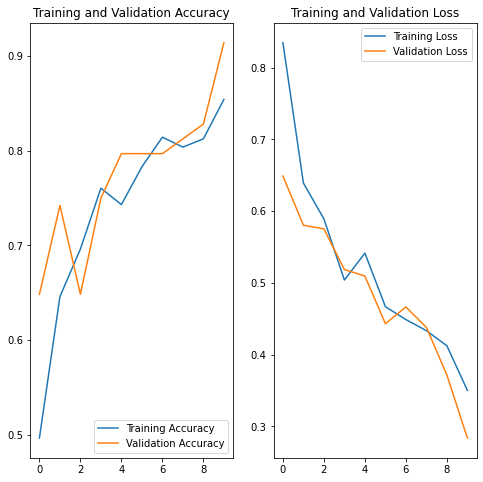

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
#evaluate the model


scores = model.evaluate_generator(evaluation_generator_gen)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Instructions for updating:
Please use Model.evaluate, which supports generators.

accuracy: 86.44%
